In [200]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [201]:
data=pd.read_csv(r'Dataset\data without infertility _final.csv')

In [202]:
data['Patient File No.'] = data['Patient File No.'].apply(lambda x:  x+10000).astype('int64')

In [203]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
0,1,20001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,2,20002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,20003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,4,20004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,20005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0


In [204]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,20271.000000,0.327172,35.961183,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,0.327172
std,156.317519,156.317519,0.469615,0.599668,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,0.469615
min,1.000000,20001.000000,0.000000,25.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,20136.000000,0.000000,36.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,0.000000
50%,271.000000,20271.000000,0.000000,36.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,0.000000
75%,406.000000,20406.000000,1.000000,36.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,1.000000
max,541.000000,20541.000000,1.000000,37.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000,1.000000


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3    Age (yrs)             541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [206]:
data.shape

(541, 43)

In [207]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [208]:
data.select_dtypes(include=['int64','float64']).columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'PCOS (Y/N).1'],
      dtype='object')

In [209]:
data['PCOS (Y/N)'].unique()

array([0, 1], dtype=int64)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3    Age (yrs)             541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

Dealing with null values

In [211]:
data.isnull().values.any()

True

In [212]:
data.isnull().values.sum()

2

In [213]:
pd.isnull(data).sum()

Sl. No                   0
Patient File No.         0
PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
F

In [214]:
data.isnull().values.any()

True

In [215]:
data.isnull().values.sum()

2

In [216]:
data2=data.drop(columns=['Sl. No','Patient File No.'])

In [217]:
data2.isnull().values.sum()

2

In [218]:
null_percent=data.isnull().sum()/data.shape[0]*100

In [219]:
null_percent

Sl. No                   0.000000
Patient File No.         0.000000
PCOS (Y/N)               0.000000
 Age (yrs)               0.000000
Weight (Kg)              0.000000
Height(Cm)               0.000000
BMI                      0.000000
Blood Group              0.000000
Pulse rate(bpm)          0.000000
RR (breaths/min)         0.000000
Hb(g/dl)                 0.000000
Cycle(R/I)               0.000000
Cycle length(days)       0.000000
Marraige Status (Yrs)    0.184843
Pregnant(Y/N)            0.000000
No. of aborptions        0.000000
FSH(mIU/mL)              0.000000
LH(mIU/mL)               0.000000
FSH/LH                   0.000000
Hip(inch)                0.000000
Waist(inch)              0.000000
Waist:Hip Ratio          0.000000
TSH (mIU/L)              0.000000
AMH(ng/mL)               0.000000
PRL(ng/mL)               0.000000
Vit D3 (ng/mL)           0.000000
PRG(ng/mL)               0.000000
RBS(mg/dl)               0.000000
Weight gain(Y/N)         0.000000
hair growth(Y/

In [220]:
data['Marraige Status (Yrs)'].fillna(0,inplace = True)


In [221]:
data.isnull().values.any()

True

In [222]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
0,1,20001,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,2,20002,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,20003,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,4,20004,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,20005,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,20537,0,36,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,0
537,538,20538,0,36,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,0
538,539,20539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,0
539,540,20540,0,36,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,0


In [223]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
0,1,20001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,2,20002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,20003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,4,20004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,20005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0


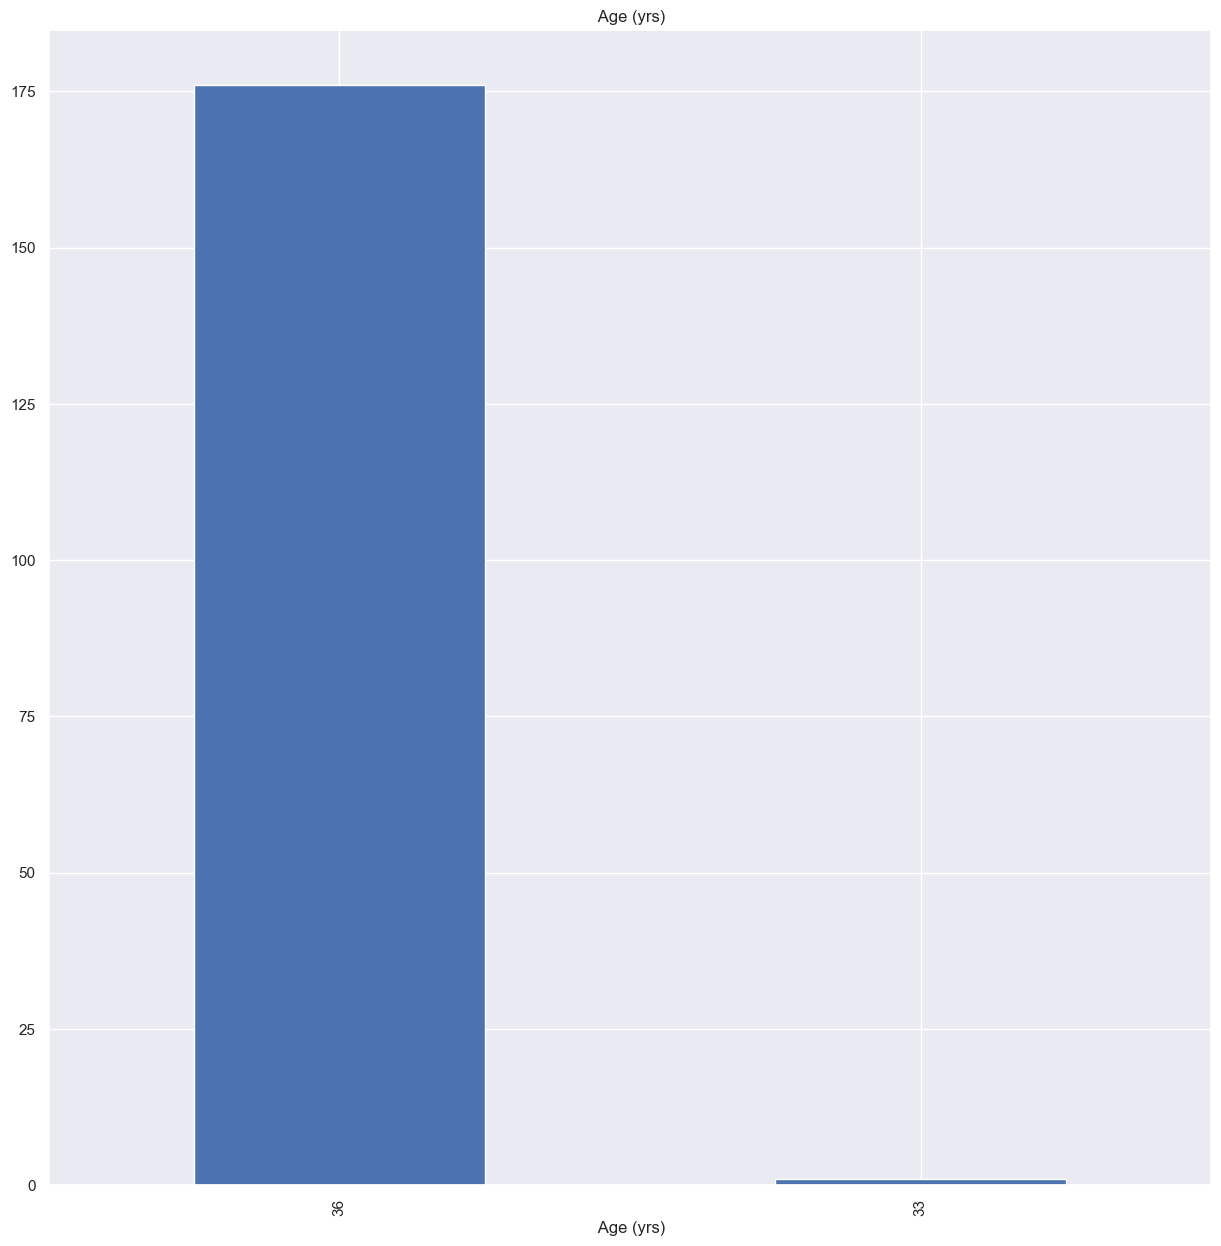

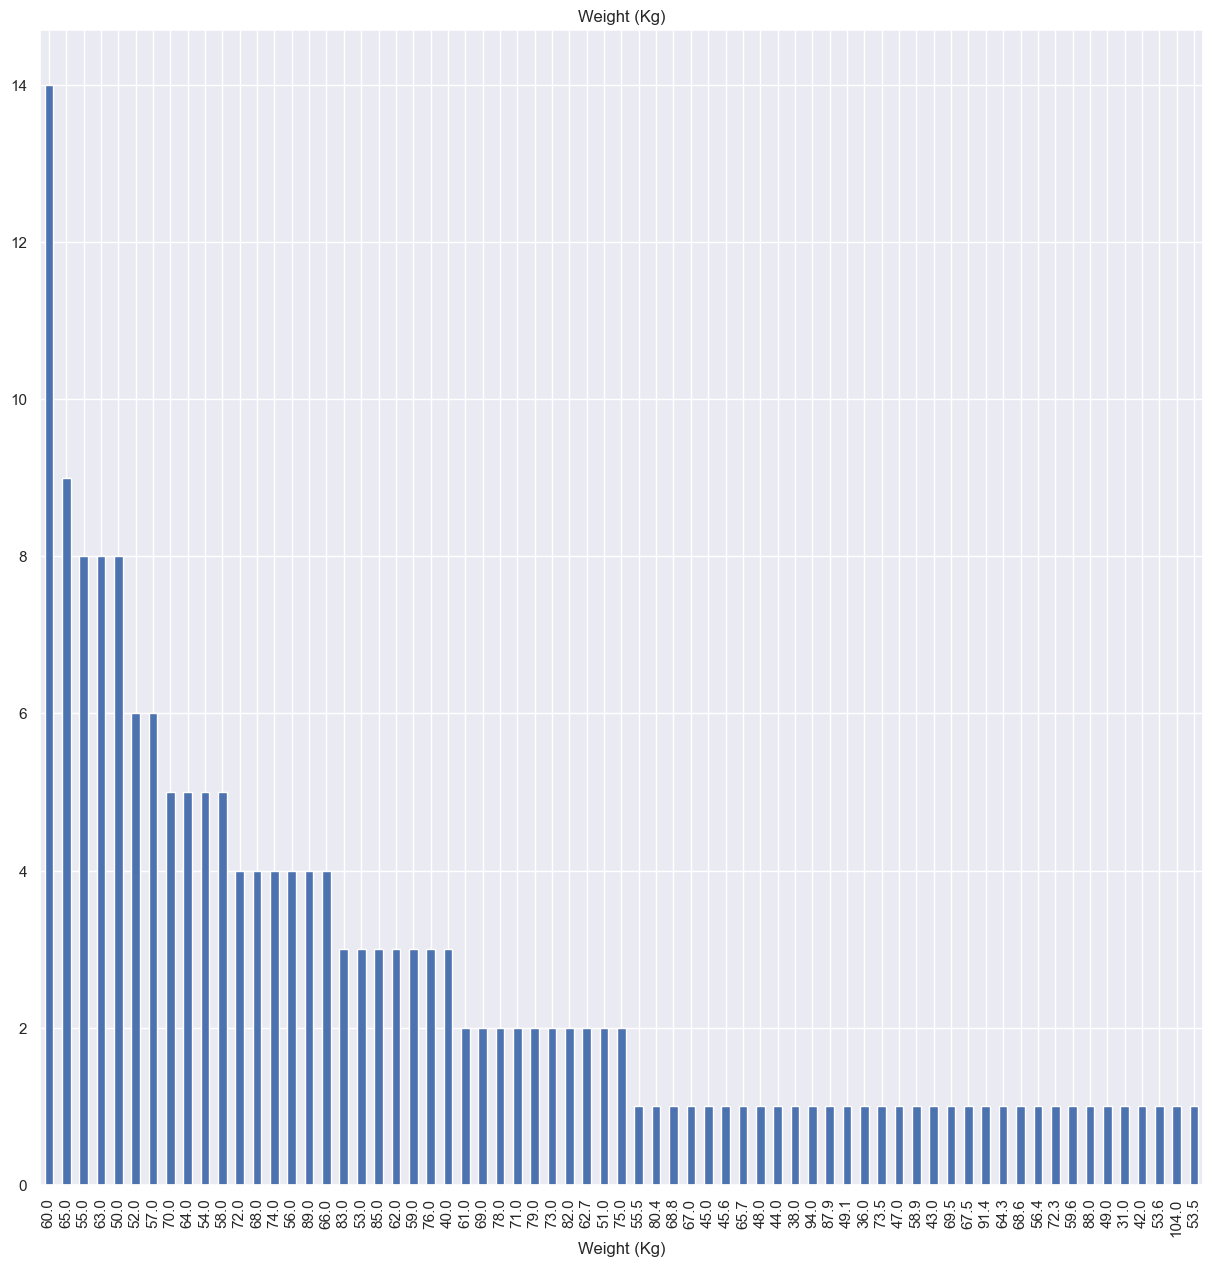

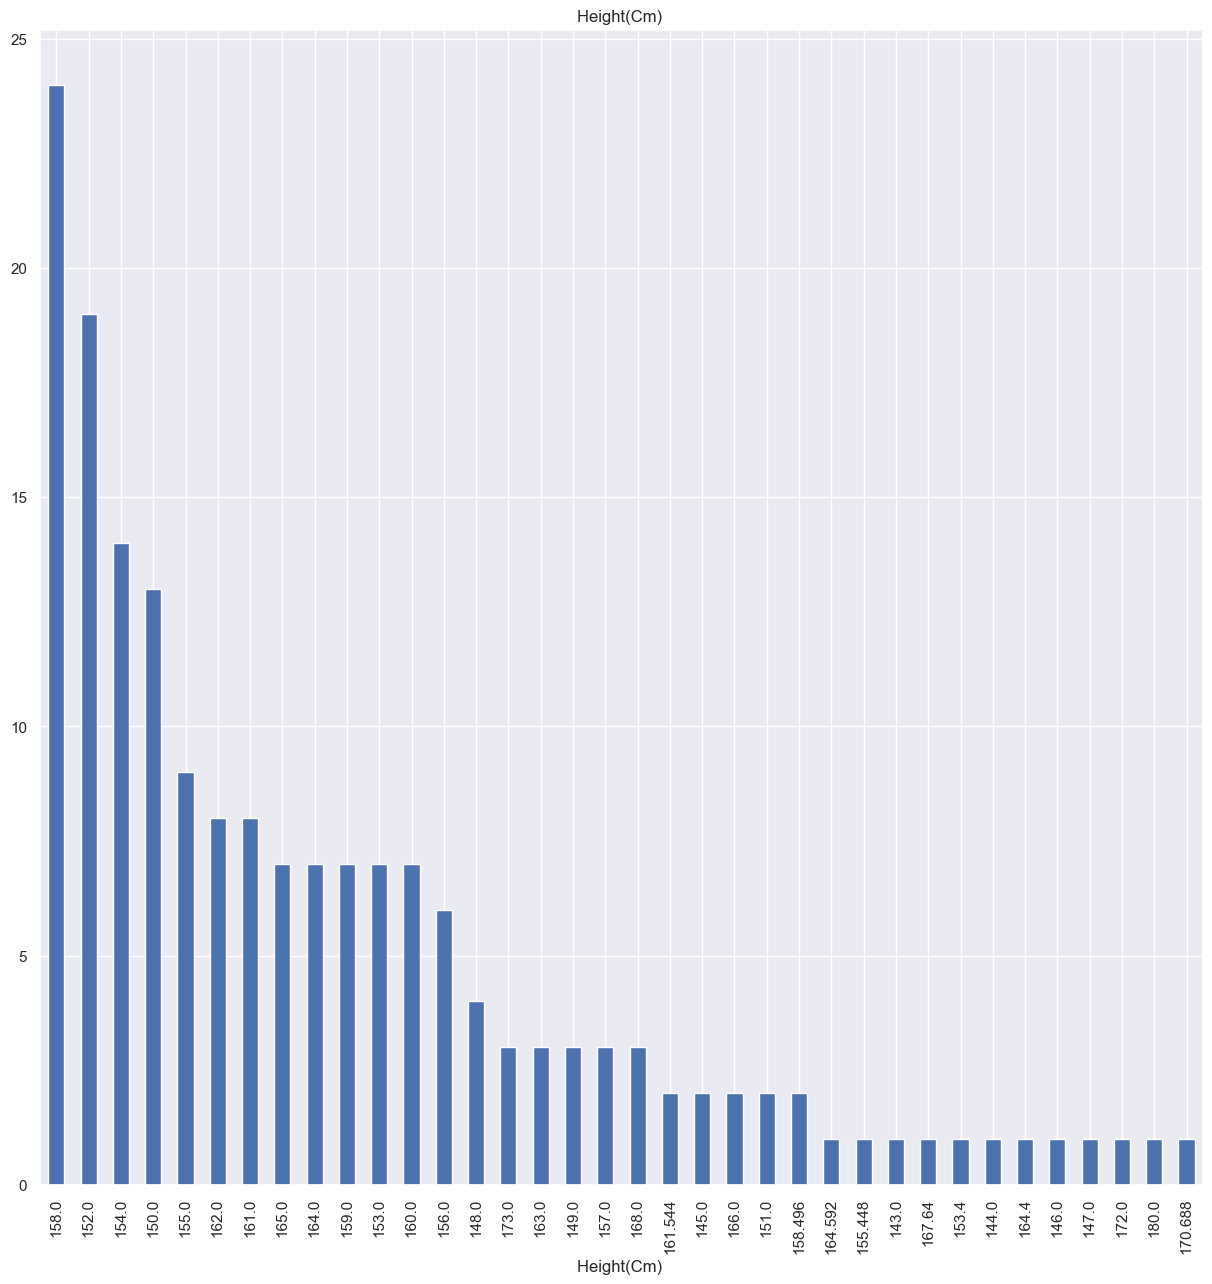

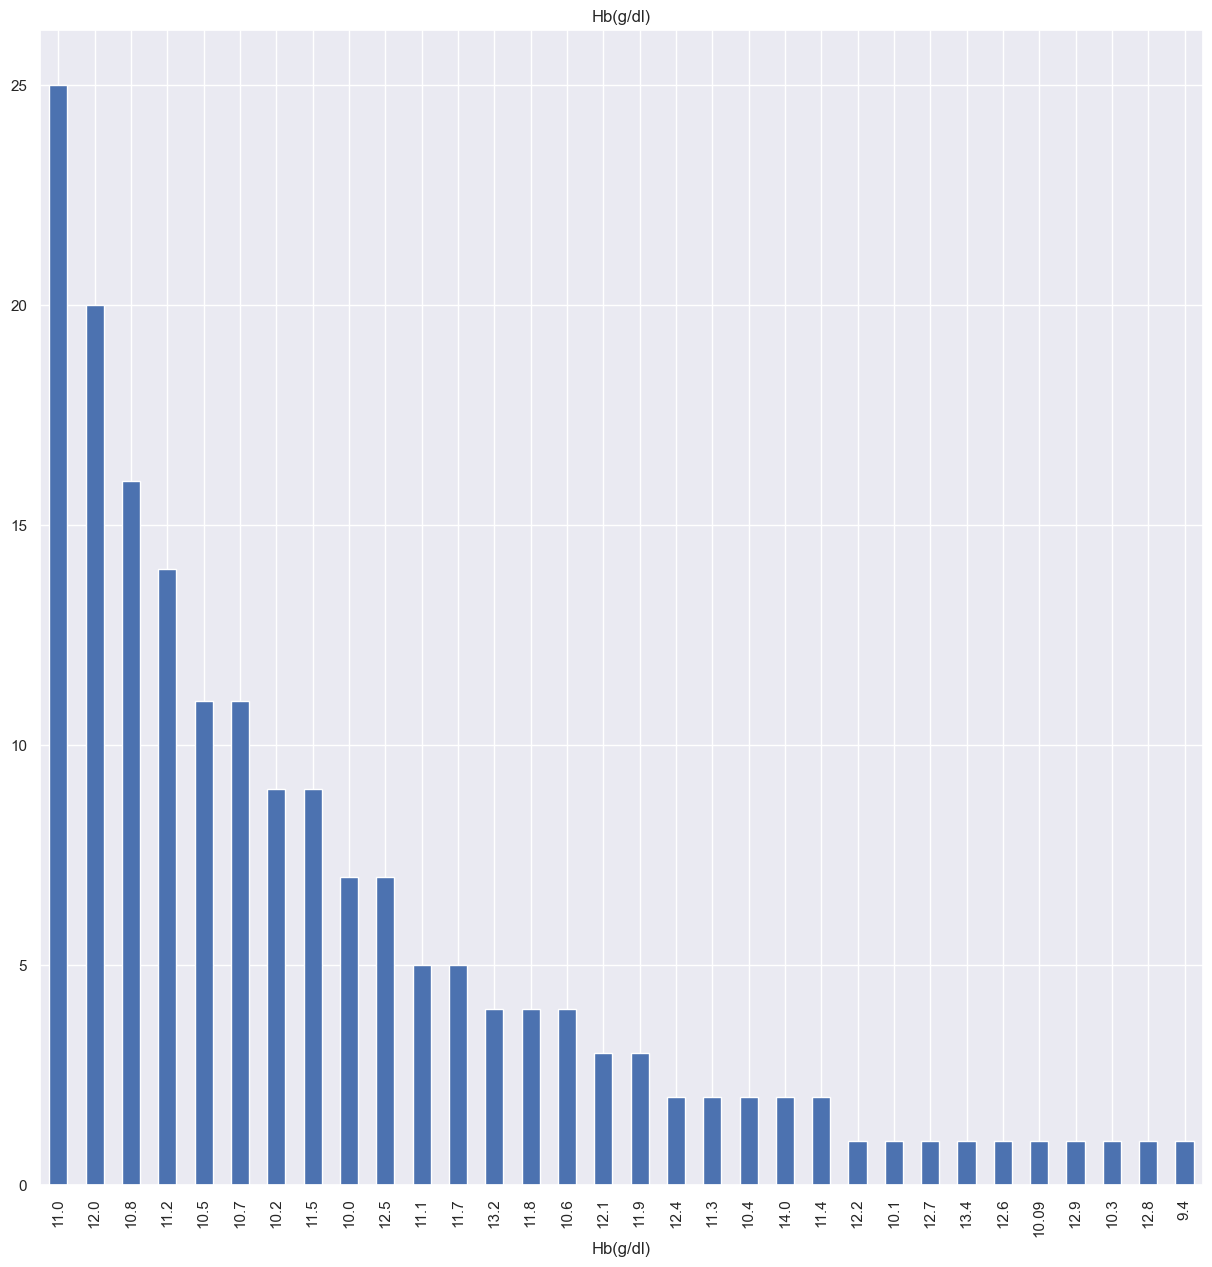

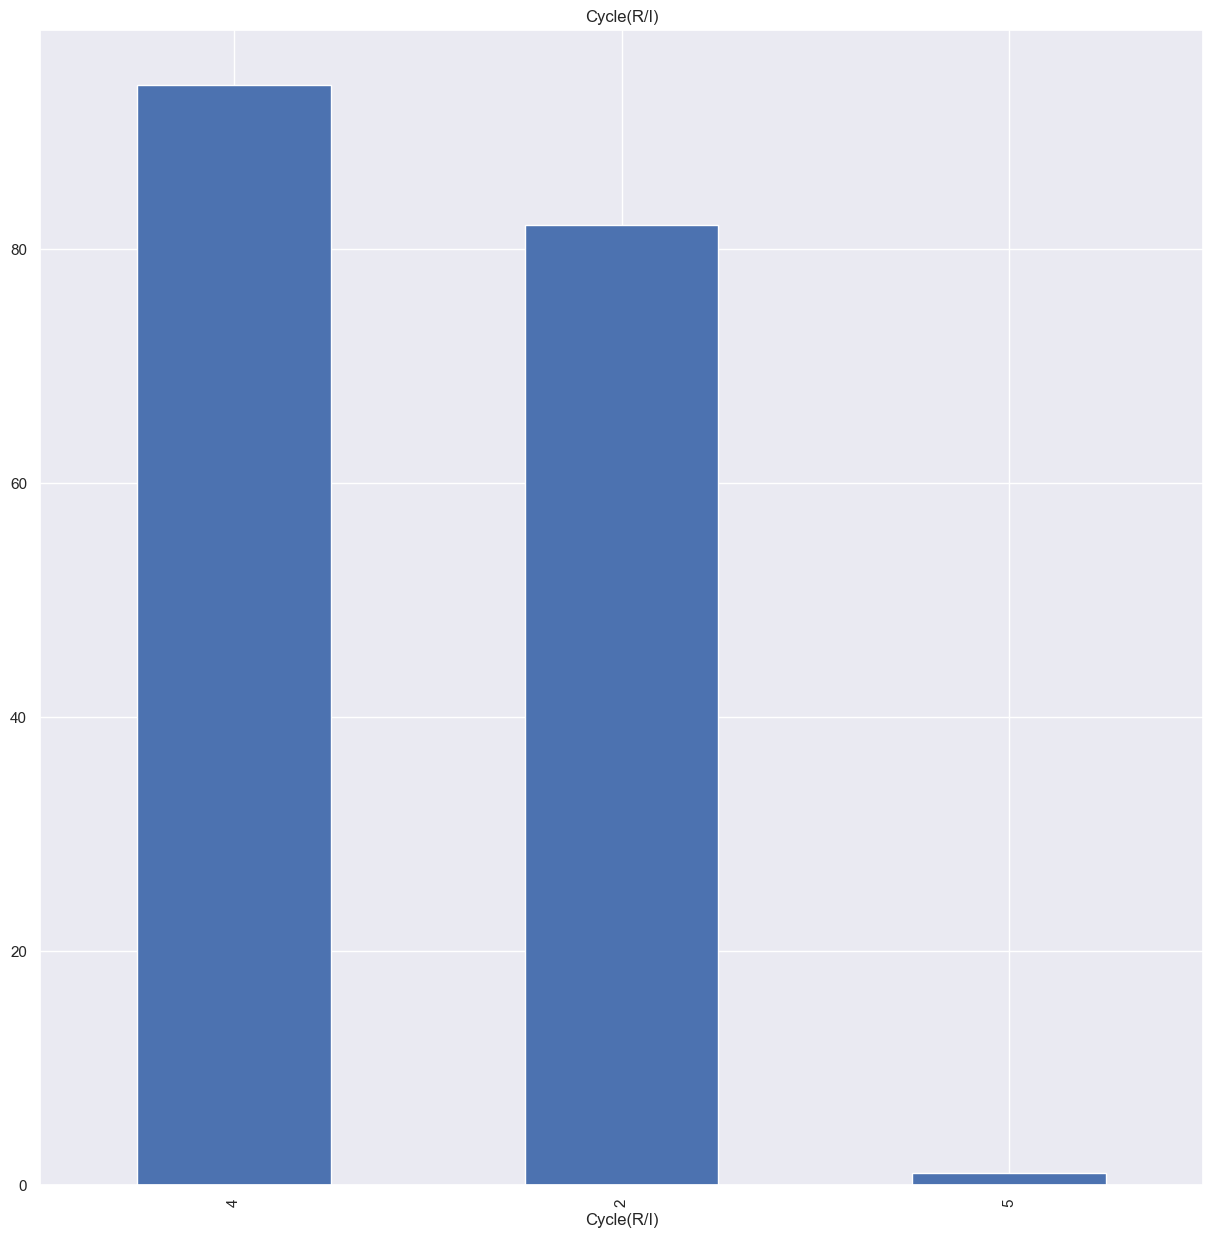

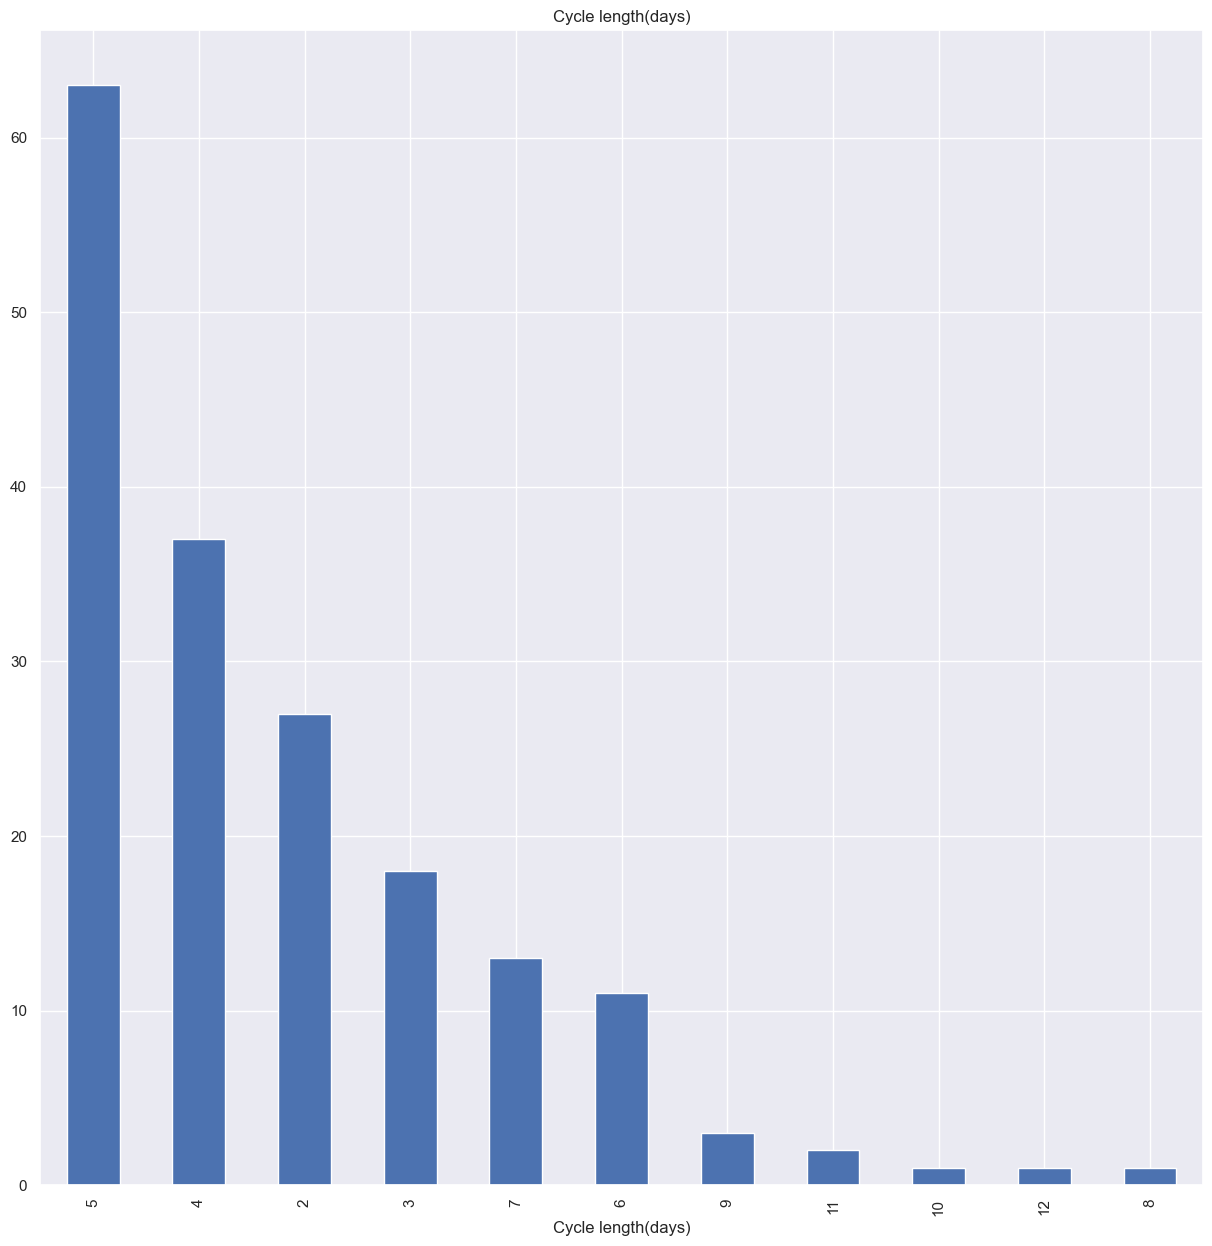

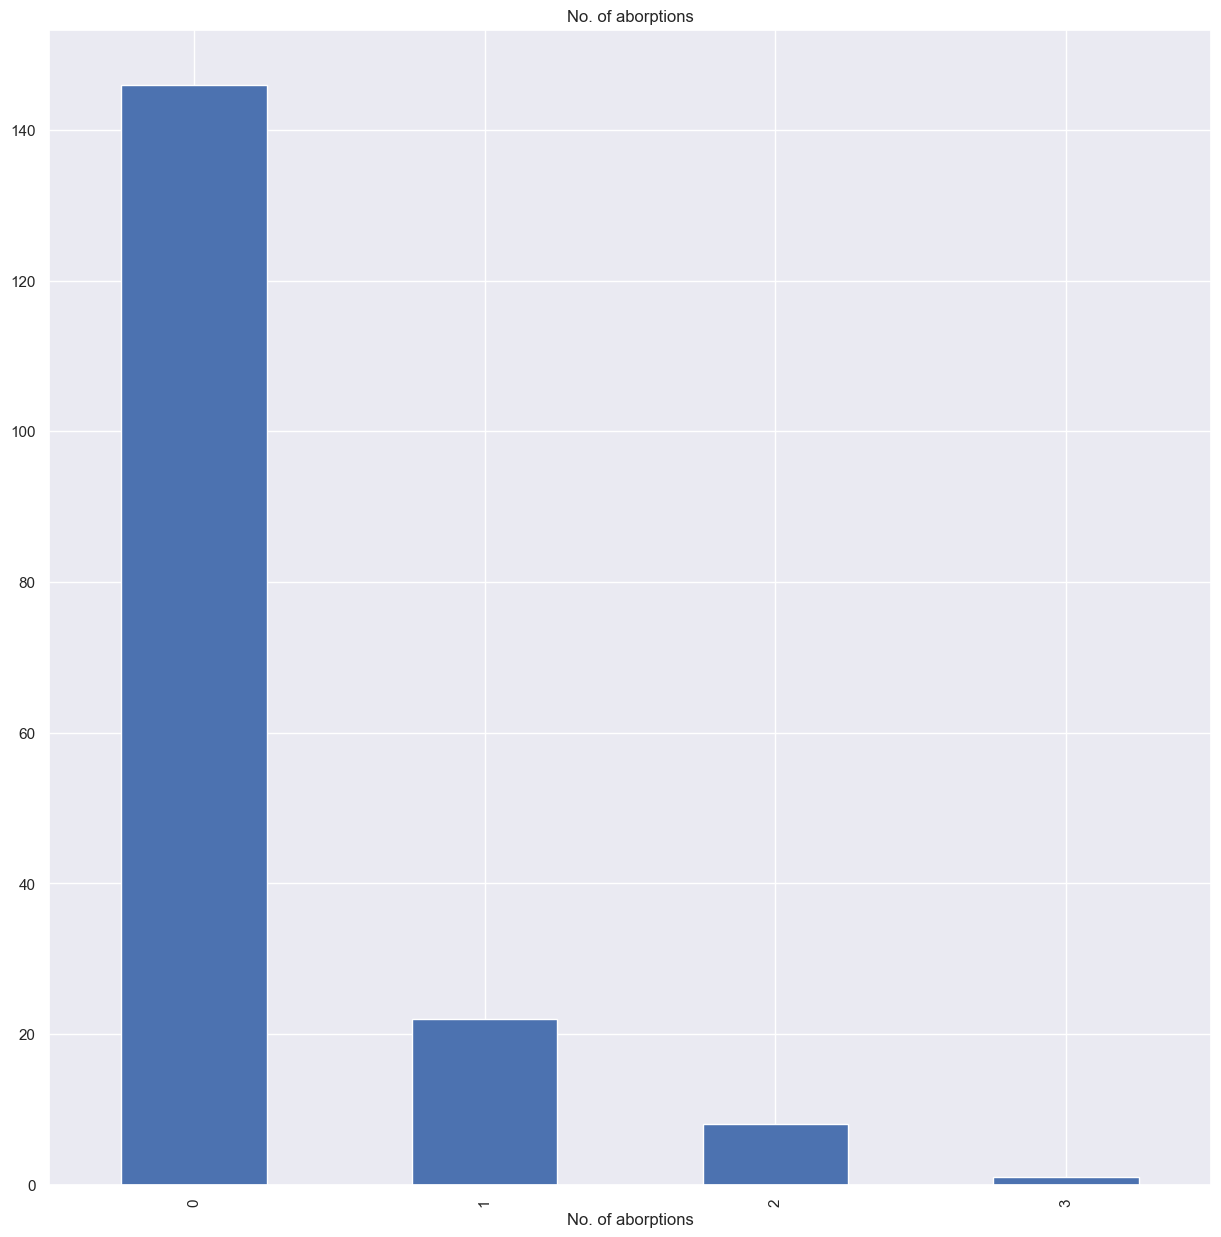

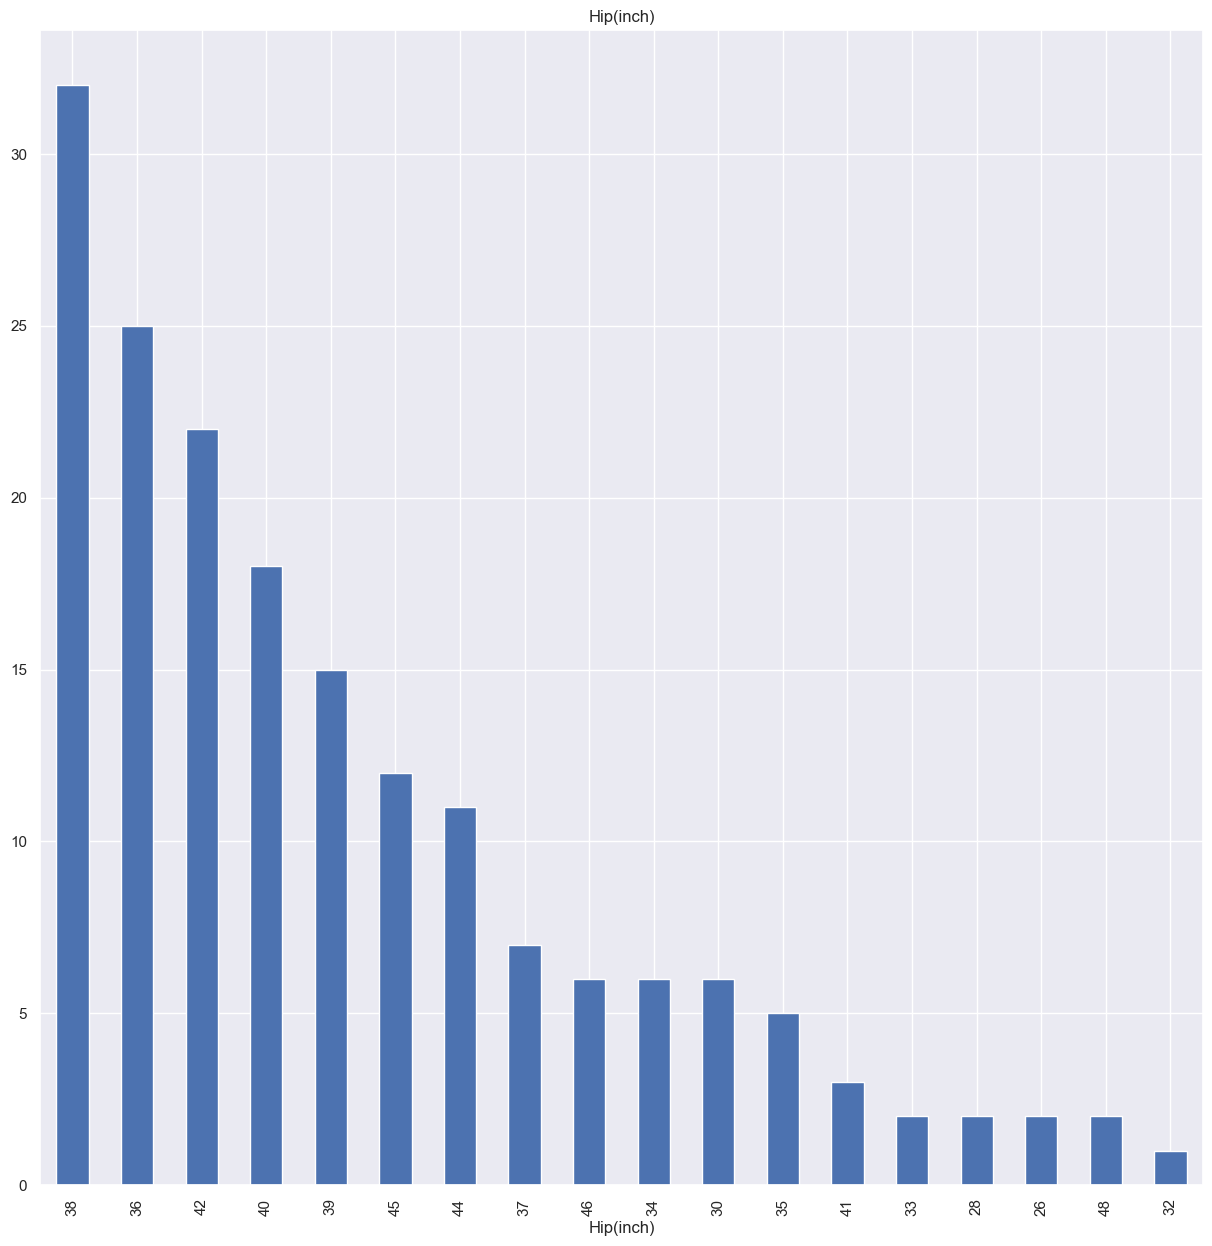

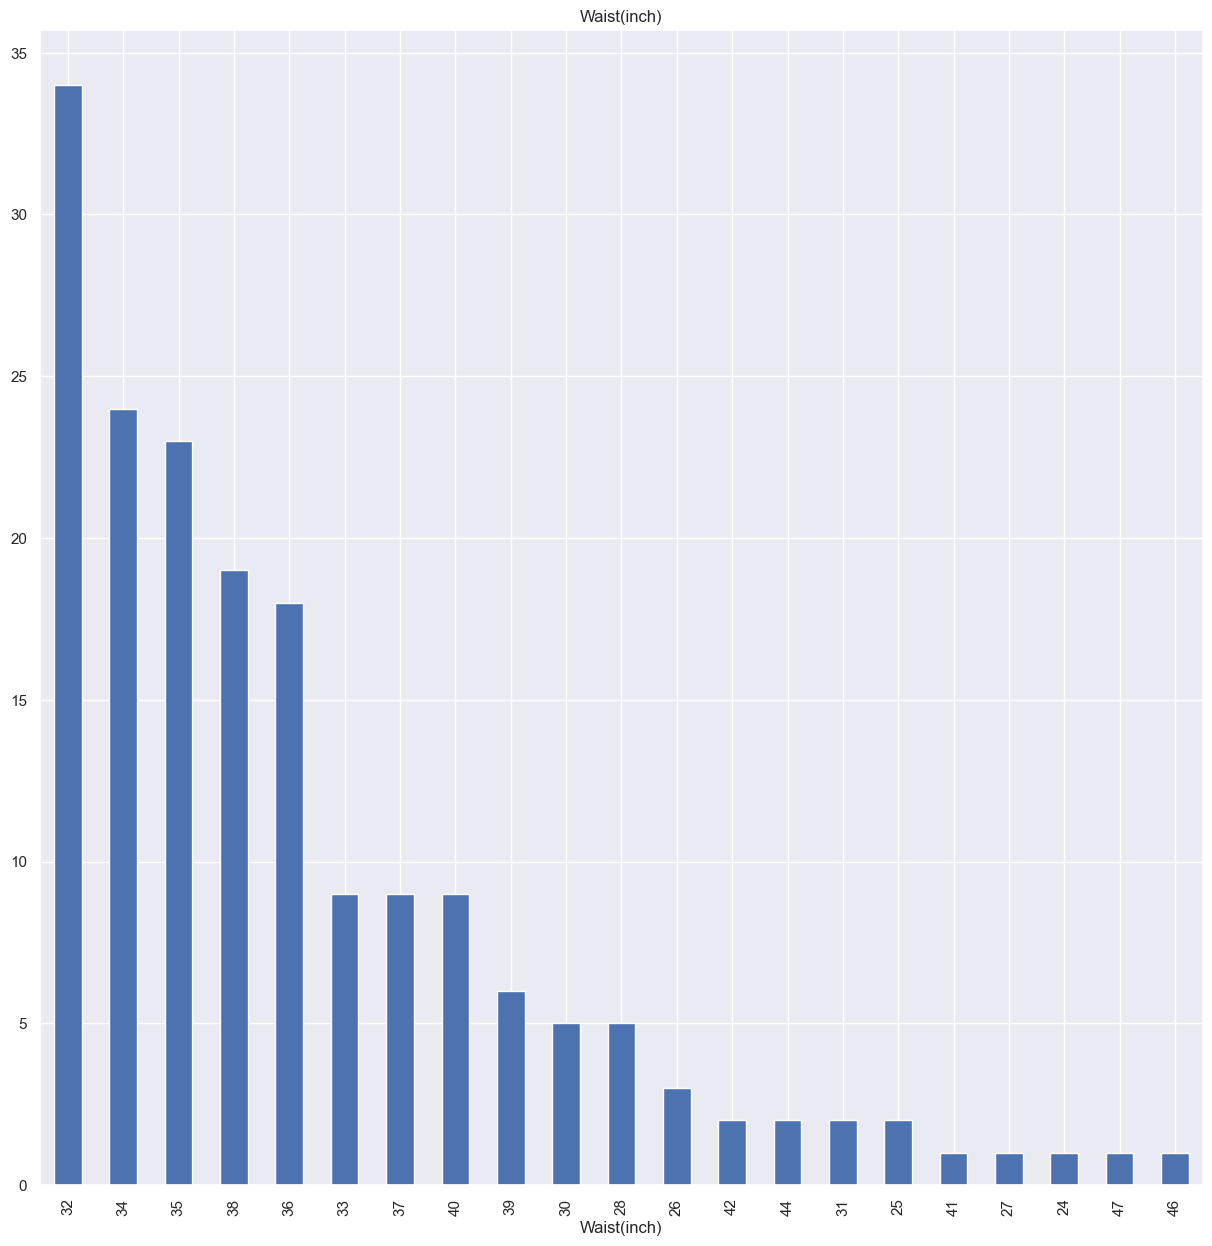

KeyError: 'PCOS (Y/N) '

In [224]:
import matplotlib.pyplot as plt #for plotting simple graphs
import seaborn as sns #another plotting library
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)','PCOS (Y/N) ']:
  sns.set(rc = {'figure.figsize':(15,15)})
  data[data['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

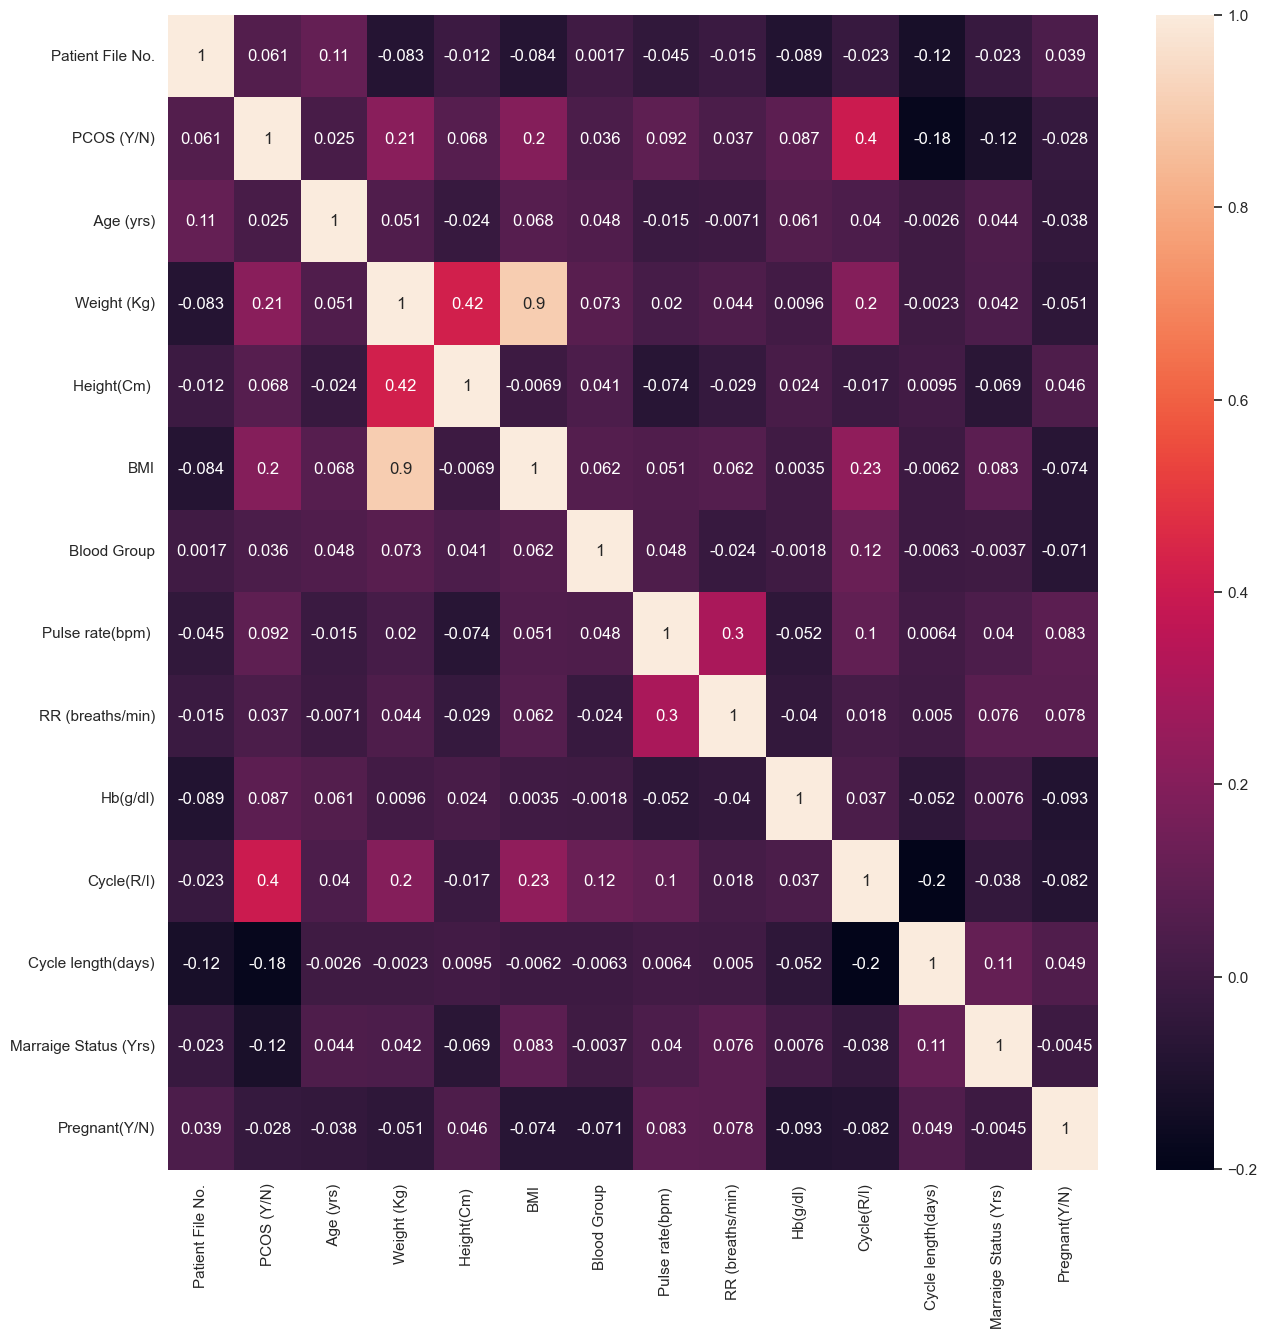

In [225]:
sns.heatmap(data.iloc[:,1:15].corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(70,70)})#<--responsible for changing the size of a seaborn plot
plt.show()

In [226]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
0,1,20001,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,2,20002,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,3,20003,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,4,20004,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,5,20005,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,20537,0,36,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,0
537,538,20538,0,36,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,0
538,539,20539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,0
539,540,20540,0,36,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,0


In [227]:
data=data.dropna()

In [228]:
X=data.drop(["PCOS (Y/N)","Patient File No.","Sl. No"],axis = 1)
y=data["PCOS (Y/N)"]

In [229]:
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 540, dtype: int64

In [230]:
X

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
0,28,44.6,152.000,19.300000,15,78,22,10.48,2,5,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,36,65.0,161.500,24.921163,15,74,20,11.70,2,5,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,33,68.8,165.000,25.270891,11,72,18,11.80,2,5,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,37,65.0,148.000,29.674945,13,72,20,12.00,2,5,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,25,52.0,161.000,20.060954,11,72,18,10.00,2,5,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,36,50.0,164.592,18.500000,17,72,16,11.00,2,5,...,0.0,0,110,70,1,0,17.5,10.0,6.7,0
537,36,63.2,158.000,25.300000,15,72,18,10.80,2,5,...,0.0,0,110,70,9,7,19.0,18.0,8.2,0
538,36,54.0,152.000,23.400000,13,74,20,10.80,2,6,...,0.0,0,110,80,1,0,18.0,9.0,7.3,0
539,36,50.0,150.000,22.200000,15,74,20,12.00,4,2,...,0.0,0,110,70,7,6,18.0,16.0,11.5,0


In [231]:
X=X.drop(columns=['BMI','FSH/LH','Waist:Hip Ratio'])

In [232]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [233]:
X


,Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N).1
0,28,44.6,152.000,15,78,22,10.48,2,5,7.0,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,36,65.0,161.500,15,74,20,11.70,2,5,11.0,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,33,68.8,165.000,11,72,18,11.80,2,5,10.0,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,37,65.0,148.000,13,72,20,12.00,2,5,4.0,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,25,52.0,161.000,11,72,18,10.00,2,5,1.0,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,36,50.0,164.592,17,72,16,11.00,2,5,8.0,...,0.0,0,110,70,1,0,17.5,10.0,6.7,0
537,36,63.2,158.000,15,72,18,10.80,2,5,4.0,...,0.0,0,110,70,9,7,19.0,18.0,8.2,0
538,36,54.0,152.000,13,74,20,10.80,2,6,8.0,...,0.0,0,110,80,1,0,18.0,9.0,7.3,0
539,36,50.0,150.000,15,74,20,12.00,4,2,2.0,...,0.0,0,110,70,7,6,18.0,16.0,11.5,0


In [234]:
# X=pd.get_dummies(X)
# X

In [235]:
# sscaler = MinMaxScaler() #helps us scale the dataset. This makes it easy for the model to train
# cols = X.columns
# x_scaled = sscaler.fit_transform(X)
# X_scaled = pd.DataFrame(x_scaled, columns = cols)
# X_scaled.shape

In [236]:
# X_scaled_values = X_scaled.to_numpy() #convert the DataFrame to a numpy array
# X_scaled_values

In [237]:
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

In [238]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10) #creates a Random forest model
rfc.fit(X_train, y_train) #trains model on data
pred_rfc = rfc.predict(X_test) #prediction
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

1.0


In [239]:
classi_report = classification_report(y_test, pred_rfc)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        33

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



In [240]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5 )
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)


1.0

In [241]:
import lightgbm as lgb

In [242]:
model2 = lgb.LGBMClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0]


In [243]:
print(accuracy_score(y_test,y_pred))

1.0


In [244]:
model_fin='final_model.pkl'

In [245]:
model=pickle.dump(model2,open(model_fin,'wb'))

In [246]:

#score = cross_val_score(stack_model,X_scaled,y,cv = 5,scoring = 'accuracy')

In [247]:
print(accuracy_score(y_test,y_pred))

1.0


ANN to predict the PCOS

In [248]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# model=Sequential()
# model.add(Dense(32,input_shape=(327,),activation='relu'))



# model.add(Dense(16, activation='relu'))
# model.add(Dense(16, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# # compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Ensemble_model containing CNN,XGboost,LightBGM,RFC

In [249]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10)
xgbt = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5)
lgbt=lgb.LGBMClassifier()


l = [('rf',rfc),('lgb',lgbt),('xgbt',xgbt)]
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier( estimators = l)
stack_model.fit(X_train,y_train)
stack_model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [ ]:
#pickle.dump(stack_model,open('model.pkl','wb'))

Model training
